![title](images/santander.png)

# <font color='green'>Santander Customer Satisfaction</font>
## <font color='green'>Quais são os clientes satisfeitos ?</font>

A satisfação do cliente é uma medida fundamental de sucesso. Clientes insatisfeitos não continuam consumindo os produtos da empresa. Além disso, os clientes insatisfeitos raramente expressam sua insatisfação antes de sair. O [Banco Santander](https://www.santanderbank.com/home) está pedindo à Kagglers que os ajude a identificar clientes insatisfeitos no início de seu relacionamento. Isso permitiria ao Santander tomar medidas proativas para melhorar a felicidade de um cliente antes que seja tarde demais. Nesta [competição](https://www.kaggle.com/competitions/santander-customer-satisfaction) do Kaggle, milhares de recursos anônimos são oferecidos com o intuito de prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária.

Este notebook abordara o problema de negócio descrito acima, passando pelas seguintes etapas de criação de um modelo classificatório:
- Análise Exploratória
- Pré-processamento:
    - Data Cleaning
    - Feature Selection
    - Over/downsampling Data
    - Data Normalization
- Criação de Modelos de Machine Learning
- Validação e Otimização do Melhor Modelo

Obs.: este projeto é uma iniciativa pessoal, não vinculada diretamente com o banco Santander.

In [1]:
# Imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import imblearn

from scipy import stats
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

In [115]:
# Versions of libraries used in the notebook
%reload_ext watermark
%watermark -a "Tharik José Sorrino dos Reis" --iversions

Author: Tharik José Sorrino dos Reis

pandas    : 1.4.2
sklearn   : 1.0.2
scipy     : 1.8.0
matplotlib: 3.4.3
seaborn   : 0.11.2
imblearn  : 0.9.0
numpy     : 1.19.5



# Carregando os dados & análise exploratória

In [7]:
df_train = pd.read_csv("santander-customer-satisfaction/train.csv")
df_test = pd.read_csv("santander-customer-satisfaction/test.csv")

df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


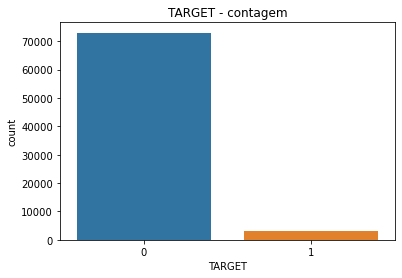

In [30]:
# Checando a necessidade de fazer o resample dos dados devido à excassez de uma das classes preditoras
sns.countplot(data = df_train, x = 'TARGET')
plt.title("TARGET - contagem");

# Data Cleaning

## Tratamento de Dados Ausentes

In [10]:
# Detectando a presença ou não de valores ausentes
for i in range(df_train.shape[1]):
    if df_train.isna().sum()[i] != 0:
        print(f"Coluna {i} possui valores ausentes")

## Tratamento de colunas com as mesmas informações

In [17]:
# Shape dos dados antes da remoção
np.shape(df_train)

(76020, 371)

In [19]:
# Removendo colunas com mesmas informações
df_train_new = df_train.T.drop_duplicates().T

df_train_new

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8.0,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829.0,2.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0.0
76016,151830.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0.0
76017,151835.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0.0
76018,151836.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0.0


## Tratamento de dados: colunas com pouca informação

In [31]:
# Removing columns where the count of its most representative element is higher than 95% of the dataset length

threshold = len(df_train_new)*0.95
cols_info = []

for i in range(df_train_new.shape[1]):
    if list(df_train_new.iloc[:,i].value_counts())[0] <= threshold:
        cols_info.append(df_train_new.iloc[:,i].name)
        #print(1)

print(len(cols_info))
np.squeeze(cols_info)

81


array(['ID', 'var15', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'ind_var5', 'ind_var12_0', 'ind_var13_0',
       'ind_var13', 'ind_var30', 'ind_var37_cte', 'ind_var37_0',
       'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5',
       'num_var12_0', 'num_var13_0', 'num_var13', 'num_op_var41_hace2',
       'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2',
       'num_op_var39_ult1', 'num_op_var39_ult3', 'num_var30_0',
       'num_var30', 'num_var35', 'num_var37_0', 'num_var39_0',
       'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var5',
       'saldo_var13', 'saldo_var30', 'saldo_var37', 'saldo_var42',
       'var36', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1',
       'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_va

In [32]:
# New dataset with only the most important columns
df_train_new = df_train[cols_info + ['TARGET']]
df_test_new = df_test[cols_info]

df_train_new.head()

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,0.0,195.0,0.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
4,10,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016,0


In [33]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        76020 non-null  int64  
 1   var15                     76020 non-null  int64  
 2   imp_op_var39_comer_ult1   76020 non-null  float64
 3   imp_op_var39_comer_ult3   76020 non-null  float64
 4   imp_op_var41_comer_ult1   76020 non-null  float64
 5   imp_op_var41_comer_ult3   76020 non-null  float64
 6   imp_op_var41_efect_ult1   76020 non-null  float64
 7   imp_op_var41_efect_ult3   76020 non-null  float64
 8   imp_op_var41_ult1         76020 non-null  float64
 9   imp_op_var39_efect_ult1   76020 non-null  float64
 10  imp_op_var39_efect_ult3   76020 non-null  float64
 11  imp_op_var39_ult1         76020 non-null  float64
 12  ind_var5                  76020 non-null  int64  
 13  ind_var12_0               76020 non-null  int64  
 14  ind_va

## Tratamento de dados duplicados

In [34]:
# Checking for duplicated rows
df_train_new.duplicated().sum()

0

## Tratamento de dados: outliers

Utilizando z-score com threshold de 3sd

In [35]:
df_train_new

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,3,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,8,37,195.0,195.0,195.0,195.0,0.0,0.0,195.0,0.0,...,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000,0
4,10,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.00,0.00,60926.490000,0
76016,151830,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36,3,9,48,130.65,0.00,0.00,0.00,118634.520000,0
76017,151835,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.00,3.00,3.00,74028.150000,0
76018,151836,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,1.74,3.00,2.58,84278.160000,0


In [36]:
# Talvez tenhamos perdido muitas informações retirando os outliers
df_train_new[(abs(stats.zscore(df_train_new)) < 3).all(axis=1)]

,ID,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,1,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.00,39205.170000,0
2,4,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.18,3.0,2.07,67333.770000,0
5,13,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.00,87975.750000,0
6,14,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.42,3.0,2.13,94956.660000,0
7,18,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2.88,0.00,3.0,2.94,251638.950000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76010,151816,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.00,165616.320000,0
76015,151829,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.00,0.00,0.0,0.00,60926.490000,0
76017,151835,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,0.00,3.0,3.00,74028.150000,0
76018,151836,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,3.00,1.74,3.0,2.58,84278.160000,0


<AxesSubplot:xlabel='TARGET', ylabel='count'>

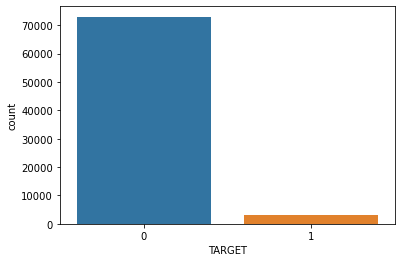

In [37]:
sns.countplot(data = df_train_new, x = 'TARGET')

Portanto, outliers não serão removidos

In [38]:
# Saving results removing the ID column
df_train_x = df_train_new.iloc[:,1:-1]
df_train_y = df_train_new.iloc[:,-1]

df_train_x.to_csv("santander-customer-satisfaction/datasets/df_train_x.csv")
df_train_y.to_csv("santander-customer-satisfaction/datasets/df_train_y.csv")
df_test_new.to_csv("santander-customer-satisfaction/datasets/df_test.csv")

# Feature Selection:
- Confecção de diferentes datasest de treino

Mesmo após a remoção de inúmeras features que julgamos não serem tão relevantes, o nosso dataset ainda possui uma grande quantidade de atributos (80 no total). 

Logo, para reduzirmos a dimensionalidade desses dados, utilizaremos algumas abordagens como: correlação, PCA, métodos ensemble

In [98]:
# Dados
df_train_x = pd.read_csv("santander-customer-satisfaction/datasets/df_train_x.csv").drop(['Unnamed: 0'], axis = 1)
df_train_y = pd.read_csv("santander-customer-satisfaction/datasets/df_train_y.csv").drop(['Unnamed: 0'], axis = 1)

df_test_new = pd.read_csv("santander-customer-satisfaction/datasets/df_test.csv").drop(['Unnamed: 0', 'ID'], axis = 1)

df_train_x.head()

,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,num_var43_recib_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,37,195.0,195.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,...,0,27,3,18,48,186.09,0.00,91.56,138.84,64007.970000
4,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016


## Correlação

Utilizaremos como critério:
- correlação dos dados entre si para excluirmos variáveis extremamente dependentes;
- correlação das colunas resultantes com a variável 'TARGET' para escolhermos as mais impactantes

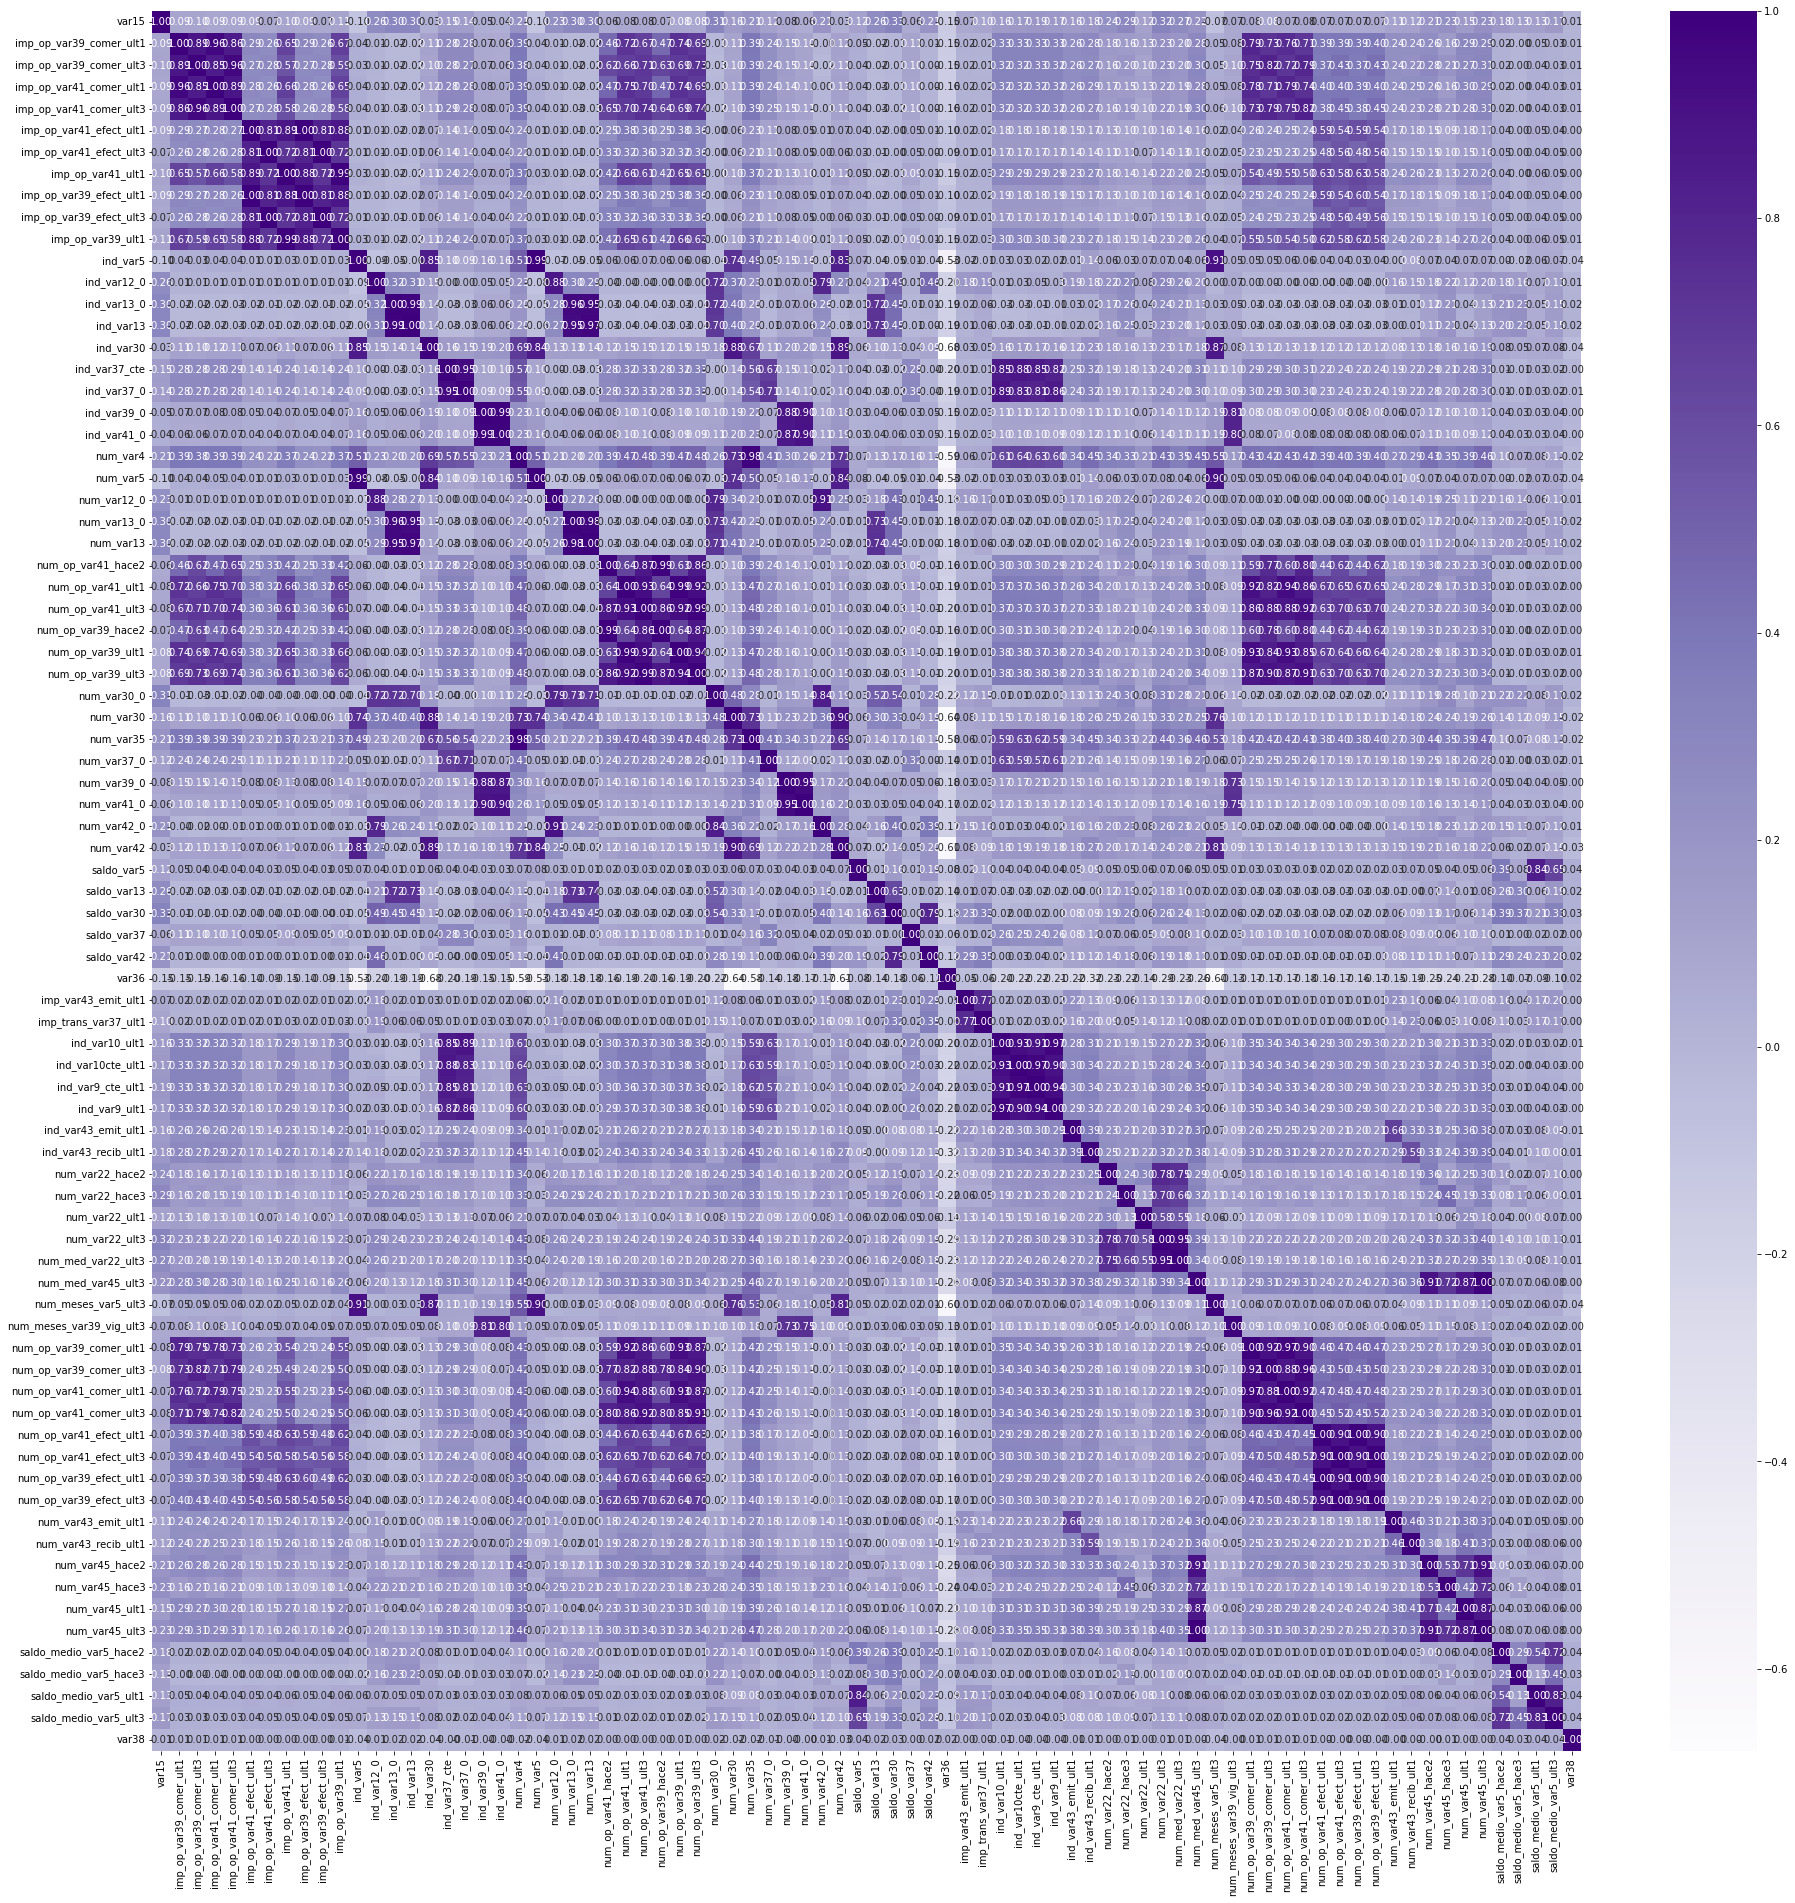

In [47]:
# Checando correlação entre as variáveis
# Mapa de correlação
plt.figure(figsize = (32, 32))
sns.heatmap(df_train_x.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

In [71]:
# Excluindo variáveis altamente correlacionadas ( corr > 0.90)
df_corr = abs(df_train_x.corr())

# analisando somente o triangulo superior da matrix de correlação, excluindo a diagonal
# principal por ser a correlação de uma variável consigo mesma 
upper_corr = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
drop_corr = [col for col in upper_corr if any(upper_corr[col] > 0.90)]
df_train_cor_x = df_train_x.drop(drop_corr, axis = 1)

print(f"Foram removidas {len(drop_corr)} colunas\n")

df_train_cor_x

Foram removidas 32 colunas



,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var5,ind_var12_0,ind_var13_0,ind_var30,...,num_op_var41_efect_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,34,0.0,0.0,0.0,0.0,0.0,0,0,1,1,...,0,0,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,23,0.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,37,195.0,195.0,0.0,0.0,195.0,1,0,0,1,...,0,0,0,3,18,186.09,0.00,91.56,138.84,64007.970000
4,39,0.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,3,6,0,0,3.00,0.30,40501.08,13501.47,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0.00,0.00,60926.490000
76016,39,0.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,0,0,3,9,130.65,0.00,0.00,0.00,118634.520000
76017,23,0.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,3.00,0.00,3.00,3.00,74028.150000
76018,25,0.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,3.00,1.74,3.00,2.58,84278.160000


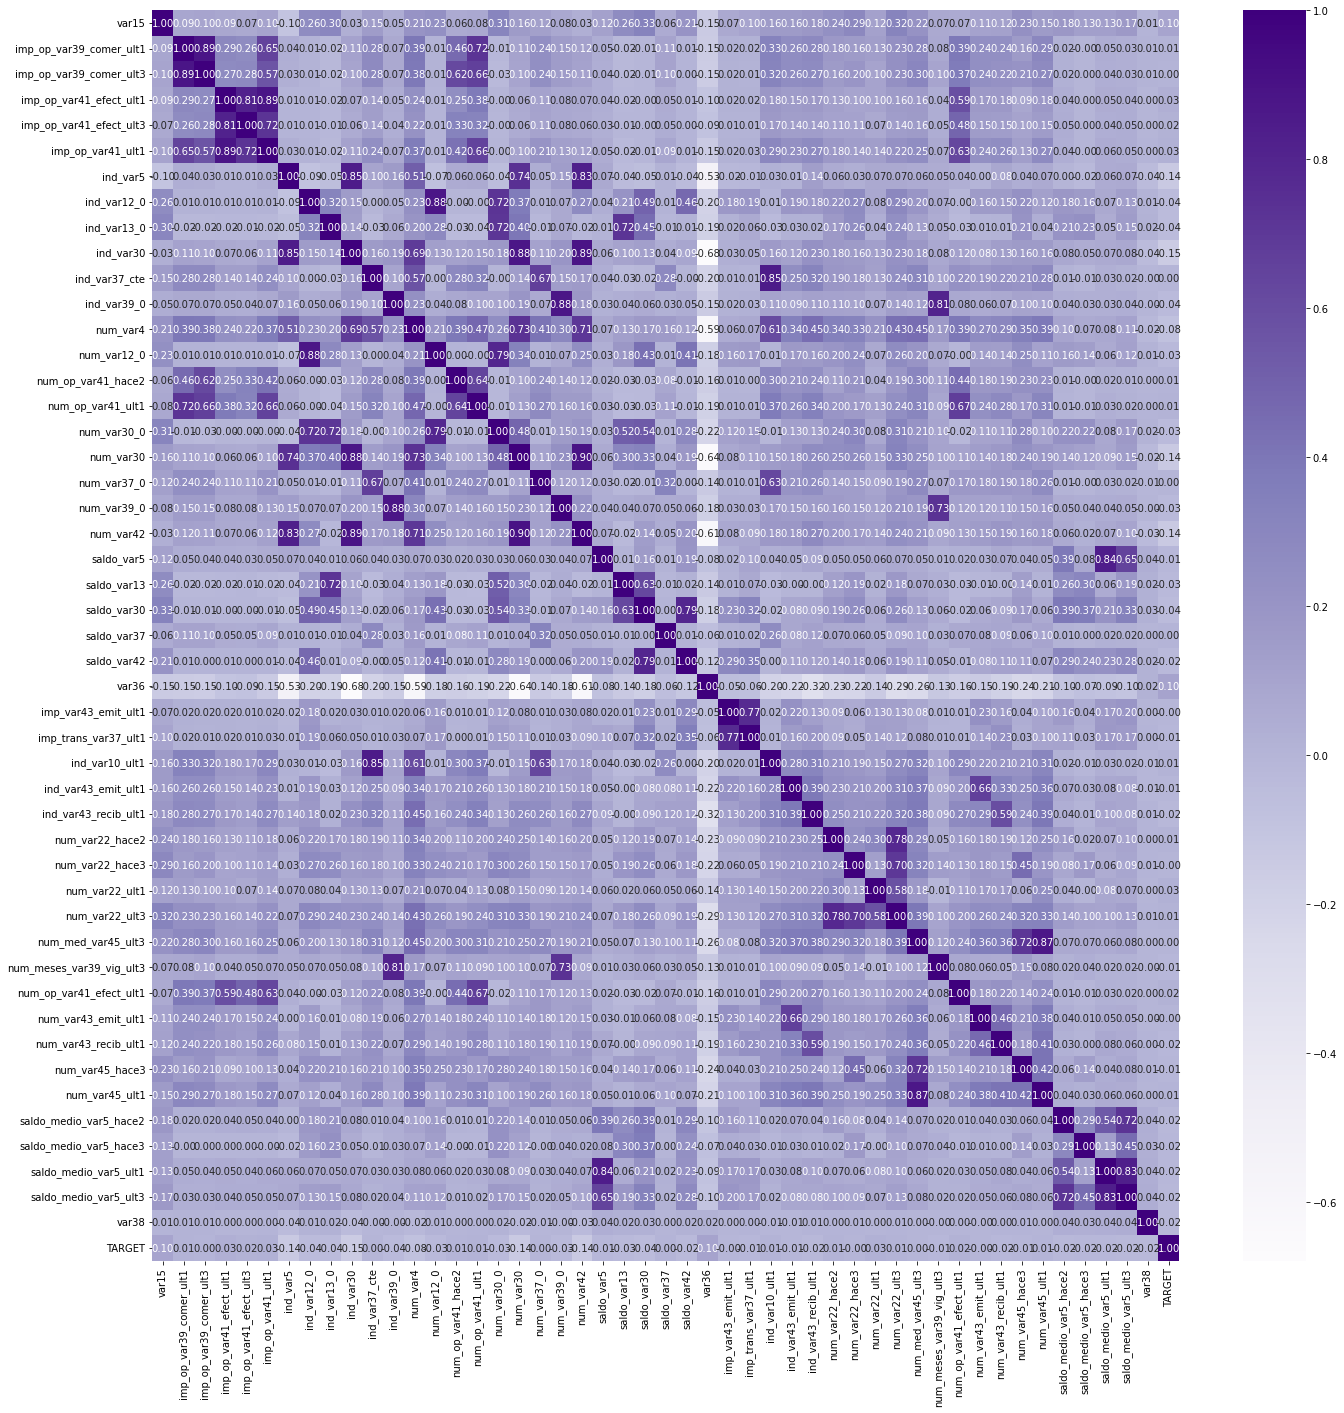

In [78]:
# Escolhendo features com as maiores correlações relacionadas à variável TARGET
df_corr_target = df_train_cor_x.merge(df_train_y, left_index=True, right_index=True).corr()

# Mapa de correlação
plt.figure(figsize = (23, 23))
sns.heatmap(df_corr_target, cmap = 'Purples', annot = True, fmt = '.2f');

In [89]:
# Escolhendo features com as maiores correlações relacionadas à variável TARGET
# variáveis com correlação maior que 0.01
th_cor = 0.01

allcols_cor_names = list((abs(df_corr_target.iloc[-1,:]) > th_cor).index)
allcols_cor_bool = list(abs(df_corr_target.iloc[-1,:]) > th_cor)

cols_cor = [x for i,x in enumerate(allcols_cor_names) if allcols_cor_bool[i]==True]

df_train_cor = df_train_new[cols_cor]
df_test_cor = df_test_new[cols_cor[:-1]]

df_train_cor

,var15,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var5,ind_var12_0,ind_var13_0,ind_var30,ind_var39_0,...,num_var22_ult3,num_meses_var39_vig_ult3,num_op_var41_efect_ult1,num_var43_recib_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38,TARGET
0,23,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,2,0,0,0.00,0.00,0.00,0.00,39205.170000,0
1,34,0.0,0.0,0.0,0.0,0,0,1,1,1,...,0,2,0,0,0.00,88.89,0.00,0.00,49278.030000,0
2,23,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,1,0,0,3.00,0.18,3.00,2.07,67333.770000,0
3,37,195.0,0.0,0.0,195.0,1,0,0,1,1,...,3,1,0,0,186.09,0.00,91.56,138.84,64007.970000,0
4,39,0.0,0.0,0.0,0.0,0,1,0,1,1,...,9,2,0,6,3.00,0.30,40501.08,13501.47,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,2,0,0,0.00,0.00,0.00,0.00,60926.490000,0
76016,39,0.0,0.0,0.0,0.0,0,1,0,1,1,...,24,2,0,0,130.65,0.00,0.00,0.00,118634.520000,0
76017,23,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,1,0,0,3.00,0.00,3.00,3.00,74028.150000,0
76018,25,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,2,0,0,3.00,1.74,3.00,2.58,84278.160000,0


In [94]:
# Saving the results
df_train_cor.iloc[:, :-1].to_csv("santander-customer-satisfaction/datasets/df_train_cor_x.csv")
df_test_cor.to_csv("santander-customer-satisfaction/datasets/df_test_cor.csv")

## PCA

As variáveis serão selecionadas automaticamente baseada no modelo de Principal Component Analysis

In [115]:
# Creating the PCA model
n_var = 15
pca = PCA(n_components = n_var)

df_train_pca = pd.DataFrame(pca.fit_transform(df_train_x))
df_test_pca = pd.DataFrame(pca.transform(df_test_new))

print(df_train_pca.shape)
print(df_test_pca.shape)

(76020, 15)
(75818, 15)


In [116]:
pca.explained_variance_ratio_

array([7.83762734e-01, 1.46873028e-01, 4.17098789e-02, 1.54958468e-02,
       6.14719524e-03, 2.25461513e-03, 1.75986720e-03, 1.39176640e-03,
       3.82616591e-04, 1.19913560e-04, 7.19104174e-05, 1.72209529e-05,
       6.34468084e-06, 5.14818647e-06, 1.09227941e-06])

In [119]:
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-78285.211592,-15649.985518,2520.350812,-403.168993,-854.220995,218.764559,52.461289,-86.883684,80.954691,3.972692,-298.027692,136.575105,-13.950153,-20.806083,0.304112
1,-68208.029791,-15482.230522,2262.935156,-401.463602,-902.383578,249.650747,101.357497,-66.538276,69.493013,17.923087,-297.207813,136.474000,-13.819032,-20.443301,0.454999
2,-50160.009094,-16068.242529,2597.822795,-389.188023,-952.687503,215.331955,35.603068,-90.100658,85.418742,0.655644,-298.618794,137.856086,-14.272746,-20.788985,0.422619
3,-53482.997606,-15908.854985,2617.590001,-398.343015,-709.611656,242.210742,-14.705582,-145.074427,109.906176,-34.096181,-61.752347,-266.187623,-4.638671,-15.383619,103.855585
4,2699.850755,202803.512559,104723.123395,264312.251206,-1501.337292,-3848.798556,4614.161424,11642.643848,18020.323466,14309.521066,-552.358766,417.128329,168.911173,-177.934433,-7.619106


In [142]:
# Saving the results
df_train_pca.to_csv("santander-customer-satisfaction/datasets/df_train_pca_x.csv")
df_test_pca.to_csv("santander-customer-satisfaction/datasets/df_test_pca.csv")

## Método Ensemble
Utilizar Bagged Decision Trees para estimar a importância de cada atributo, retornando um score que quanto maior for, maior será a importância do respectivo atributo. 

In [135]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação e Treinamento do Modelo - Feature Selection
ETC_featSelection = ExtraTreesClassifier()
ETC_featSelection.fit(df_train_x, df_train_y['TARGET'])

ExtraTreesClassifier()

In [137]:
# Criando um dicionário com os nomes das colunas e suas respectivas 'importancias'
dict_imp = dict(zip(df_train_x.columns, ETC_featSelection.feature_importances_))
etc_list = sorted(dict_imp.items(), key=lambda x:x[1], reverse = True)
dict_etc_sort = dict(etc_list)
dict_etc_sort

# Selecionando as 30 variáveis mais importantes
n = 30
etc_imp_col = [list(dict_etc_sort.keys())[i] for i in range(n)]

# Criando um dataframe com essas variáveis
df_train_etc_x = df_train_x[etc_imp_col]
df_test_etc = df_test_new[etc_imp_col]

In [138]:
df_train_etc_x.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,39205.170000,23,0.00,0.00,0,0,0,0,0.00,0,...,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,49278.030000,34,88.89,0.00,0,0,0,0,0.00,0,...,2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,67333.770000,23,0.18,2.07,0,0,0,0,3.00,0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,64007.970000,37,0.00,138.84,48,3,27,3,186.09,18,...,1,1,0,1,0.0,195.0,195.0,195.0,0.0,195.0
4,117310.979016,39,0.30,13501.47,0,0,0,9,3.00,0,...,2,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Saving the results
df_train_etc_x.to_csv("santander-customer-satisfaction/datasets/df_train_etc_x.csv")
df_test_etc.to_csv("santander-customer-satisfaction/datasets/df_test_etc.csv")

# Tratamento de dados: Classes desbalanceadas 

A estratégia utilizada para lidar com a escassez de entrada da classe 1 foi utilizar o método SMOTETomek de up/downsampling

### Dataset Correlação

In [176]:
# Carregando os dados
df_train_cor_x = pd.read_csv("santander-customer-satisfaction/datasets/df_train_cor_x.csv", index_col = 0)
df_train_y = pd.read_csv("santander-customer-satisfaction/datasets/df_train_y.csv", index_col = 0)

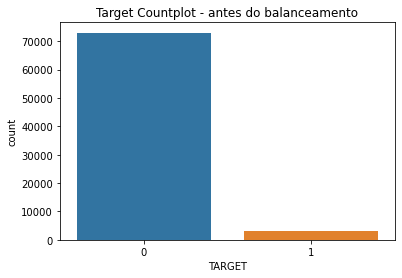

In [170]:
# Countplot antes do balanceamento
sns.countplot(x = df_train_y['TARGET'])
plt.title("Target Countplot - antes do balanceamento");

In [171]:
# Criando e treinando o modelo SMOTETomek
smote_tomek_cor = SMOTETomek()
df_train_cor_resamp_x, df_train_cor_resamp_y = smote_tomek_cor.fit_resample(df_train_cor_x, df_train_y['TARGET'])

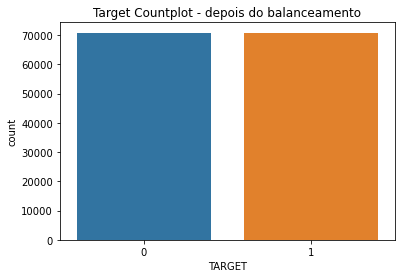

In [172]:
# Countplot depois do balanceamento
sns.countplot(x = df_train_cor_resamp_y)
plt.title("Target Countplot - depois do balanceamento");

In [174]:
df_train_cor_resamp_x

,var15,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var5,ind_var12_0,ind_var13_0,ind_var30,ind_var39_0,...,num_var22_ult1,num_var22_ult3,num_meses_var39_vig_ult3,num_op_var41_efect_ult1,num_var43_recib_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,0,2,0,0,0.000000,0.000000,0.000000,0.000000,39205.170000
1,34,0.0,0.0,0.0,0.0,0,0,1,1,1,...,0,0,2,0,0,0.000000,88.890000,0.000000,0.000000,49278.030000
2,23,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,0,1,0,0,3.000000,0.180000,3.000000,2.070000,67333.770000
3,37,195.0,0.0,0.0,195.0,1,0,0,1,1,...,0,3,1,0,0,186.090000,0.000000,91.560000,138.840000,64007.970000
4,39,0.0,0.0,0.0,0.0,0,1,0,1,1,...,6,9,2,0,6,3.000000,0.300000,40501.080000,13501.470000,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141603,33,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,0,2,0,0,0.000000,0.000000,0.000000,0.000000,117310.979016
141604,29,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,1,2,0,0,1.688475,0.236386,1.688475,1.198817,57712.365169
141605,24,0.0,0.0,0.0,0.0,0,0,0,0,0,...,2,6,1,0,0,0.946947,0.000000,8.417311,4.692651,33936.212116
141606,28,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,0,2,0,0,3.000000,2.271076,3.000000,2.767025,79805.002211


In [175]:
# Saving the results
df_train_cor_resamp_x.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_cor_resamp_x.csv")
df_train_cor_resamp_y.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_cor_resamp_y.csv")

### Dataset PCA

In [177]:
# Carregando os dados
df_train_pca_x = pd.read_csv("santander-customer-satisfaction/datasets/df_train_pca_x.csv", index_col = 0)
df_train_y = pd.read_csv("santander-customer-satisfaction/datasets/df_train_y.csv", index_col = 0)

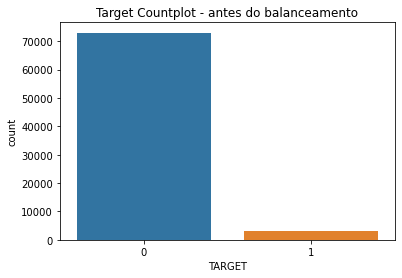

In [163]:
# Countplot antes do balanceamento
sns.countplot(x = df_train_y['TARGET'])
plt.title("Target Countplot - antes do balanceamento");

In [165]:
# Criando e treinando o modelo SMOTETomek
smote_tomek_pca = SMOTETomek()
df_train_pca_resamp_x, df_train_pca_resamp_y = smote_tomek_pca.fit_resample(df_train_pca_x, df_train_y['TARGET'])

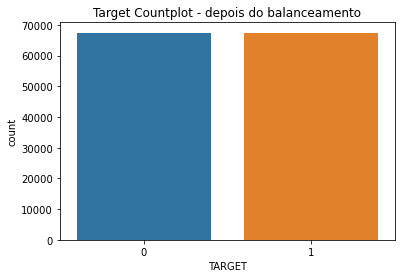

In [166]:
# Countplot antes do balanceamento
sns.countplot(x = df_train_pca_resamp_y)
plt.title("Target Countplot - depois do balanceamento");

In [168]:
df_train_pca_resamp_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-78285.211592,-15649.985518,2520.350812,-403.168993,-854.220995,218.764559,52.461289,-86.883684,80.954691,3.972692,-298.027692,136.575105,-13.950153,-20.806083,0.304112
1,-68208.029791,-15482.230522,2262.935156,-401.463602,-902.383578,249.650747,101.357497,-66.538276,69.493013,17.923087,-297.207813,136.474000,-13.819032,-20.443301,0.454999
2,-50160.009094,-16068.242529,2597.822795,-389.188023,-952.687503,215.331955,35.603068,-90.100658,85.418742,0.655644,-298.618794,137.856086,-14.272746,-20.788985,0.422619
3,-53482.997606,-15908.854985,2617.590001,-398.343015,-709.611656,242.210742,-14.705582,-145.074427,109.906176,-34.096181,-61.752347,-266.187623,-4.638671,-15.383619,103.855585
4,2699.850755,202803.512559,104723.123395,264312.251206,-1501.337292,-3848.798556,4614.161424,11642.643848,18020.323466,14309.521066,-552.358766,417.128329,168.911173,-177.934433,-7.619106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134945,-178.403695,-16254.599478,2969.139171,342.915523,-344.184496,146.643541,79.636523,-538.679486,144.452160,-6.990270,3889.175718,-2276.117734,499.085042,-254.040159,869.817182
134946,-187.373988,-16786.632443,2734.629169,-332.590281,-827.351669,296.443458,-74.001831,-206.117115,181.879224,14.031114,1065.467104,-667.175796,-153.954904,641.528246,-3.090528
134947,-96890.001125,-15370.408344,2469.991232,-412.761050,-785.638778,220.480138,63.371674,-84.830651,77.877332,6.266621,-297.629899,135.684709,-13.719625,-20.783140,0.189858
134948,-68403.950772,-15795.463761,2547.938994,-398.450655,-886.760627,218.204852,47.513228,-87.900289,82.457457,2.785922,-298.021658,136.602386,-13.965283,-20.569566,0.404536


In [180]:
# Saving the results
df_train_pca_resamp_x.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_pca_resamp_x.csv")
df_train_pca_resamp_y.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_pca_resamp_y.csv")

### Dataset Ensemble

In [181]:
# Carregando os dados
df_train_etc_x = pd.read_csv("santander-customer-satisfaction/datasets/df_train_etc_x.csv", index_col = 0)
df_train_y = pd.read_csv("santander-customer-satisfaction/datasets/df_train_y.csv", index_col = 0)

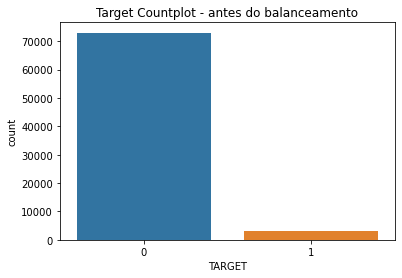

In [182]:
# Countplot antes do balanceamento
sns.countplot(x = df_train_y['TARGET'])
plt.title("Target Countplot - antes do balanceamento");

In [183]:
# Criando e treinando o modelo SMOTETomek
smote_tomek_etc = SMOTETomek()
df_train_etc_resamp_x, df_train_etc_resamp_y = smote_tomek_etc.fit_resample(df_train_etc_x, df_train_y['TARGET'])

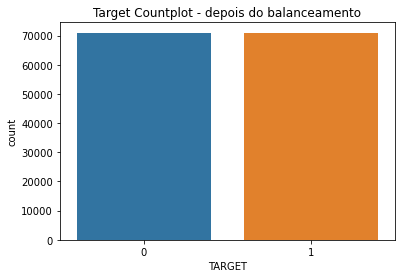

In [184]:
# Countplot antes do balanceamento
sns.countplot(x = df_train_etc_resamp_y)
plt.title("Target Countplot - depois do balanceamento");

In [185]:
df_train_etc_resamp_x

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,39205.170000,23,0.000000,0.000000,0,0,0,0,0.000000,0,...,2,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,49278.030000,34,88.890000,0.000000,0,0,0,0,0.000000,0,...,2,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,67333.770000,23,0.180000,2.070000,0,0,0,0,3.000000,0,...,1,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,64007.970000,37,0.000000,138.840000,48,3,27,3,186.090000,18,...,1,1,0,1,0.000000,195.000000,195.000000,195.000000,0.000000,195.000000
4,117310.979016,39,0.300000,13501.470000,0,0,0,9,3.000000,0,...,2,1,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141927,117310.979016,32,130.065426,5939.157494,52,8,38,3,7873.055671,5,...,1,1,0,1,3104.279248,3041.318949,1929.450211,3041.318949,3104.279248,1929.450211
141928,117310.979016,42,21.986507,216.449310,79,50,22,3,166.406057,6,...,2,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
141929,117310.979016,47,0.000000,0.000000,0,0,0,0,0.000000,0,...,2,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
141930,117310.979016,34,0.645265,2.205088,0,0,0,0,3.000000,0,...,2,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [186]:
# Saving the results
df_train_etc_resamp_x.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_x.csv")
df_train_etc_resamp_y.to_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_y.csv")

# Prediction Models

In [196]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
XGB = XGBClassifier(booster = 'gbtree',
                        eta = 0.1,
                        gamma = 0,
                        max_depth = 5,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        objective = 'binary:logistic',
                        base_score = 0.5,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        eval_metric = 'auc'
                        )   

# Cross Validation
XGB_results = cross_val_score(XGB_cor, train_norm_x, train_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (XGB_results.mean() * 100))

Acurácia: 88.848


## Dataset: Correlation

In [210]:
# Carregando os dados
train_cor_x = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_cor_resamp_x.csv", index_col = 0)
train_cor_y = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_cor_resamp_y.csv", index_col = 0)

train_cor_x.head()

,var15,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var5,ind_var12_0,ind_var13_0,ind_var30,ind_var39_0,...,num_var22_ult1,num_var22_ult3,num_meses_var39_vig_ult3,num_op_var41_efect_ult1,num_var43_recib_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,23,0.0,0.0,0.0,0.0,0,0,0,0,1,...,0,0,2,0,0,0.00,0.00,0.00,0.00,39205.170000
1,34,0.0,0.0,0.0,0.0,0,0,1,1,1,...,0,0,2,0,0,0.00,88.89,0.00,0.00,49278.030000
2,23,0.0,0.0,0.0,0.0,1,0,0,1,1,...,0,0,1,0,0,3.00,0.18,3.00,2.07,67333.770000
3,37,195.0,0.0,0.0,195.0,1,0,0,1,1,...,0,3,1,0,0,186.09,0.00,91.56,138.84,64007.970000
4,39,0.0,0.0,0.0,0.0,0,1,0,1,1,...,6,9,2,0,6,3.00,0.30,40501.08,13501.47,117310.979016


In [211]:
# Normalizando os dados não categóricos (com valores unicos maiores do que 20) utilisando o StandardScaler

cols_to_norm = [col for col in train_cor_x if train_cor_x[col].nunique() > 20]
train_cor_x[cols_to_norm] = train_cor_x[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

In [212]:
train_cor_x.head()

,var15,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var5,ind_var12_0,ind_var13_0,ind_var30,ind_var39_0,...,num_var22_ult1,num_var22_ult3,num_meses_var39_vig_ult3,num_op_var41_efect_ult1,num_var43_recib_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,-1.078622,-0.210789,-0.167009,-0.162622,-0.218339,0,0,0,0,1,...,-0.273438,-0.479196,2,-0.233084,-0.219275,-0.107934,-0.070239,-0.097989,-0.108397,-0.472960
1,-0.172005,-0.210789,-0.167009,-0.162622,-0.218339,0,0,1,1,1,...,-0.273438,-0.479196,2,-0.233084,-0.219275,-0.107934,-0.058274,-0.097989,-0.108397,-0.402222
2,-1.078622,-0.210789,-0.167009,-0.162622,-0.218339,1,0,0,1,1,...,-0.273438,-0.479196,1,-0.233084,-0.219275,-0.107609,-0.070215,-0.097577,-0.108065,-0.275423
3,0.075254,0.351306,-0.167009,-0.162622,0.040338,1,0,0,1,1,...,-0.273438,0.009582,1,-0.233084,-0.219275,-0.087811,-0.070239,-0.085429,-0.086180,-0.298779
4,0.240094,-0.210789,-0.167009,-0.162622,-0.218339,0,1,0,1,1,...,2.500799,0.987137,2,-0.233084,1.910114,-0.107609,-0.070199,5.457847,2.052023,0.075548


### Logistic Regression

In [213]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LR_cor = LogisticRegression(max_iter = 300)

# Cross Validation
LR_results = cross_val_score(LR_cor, train_cor_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LR_results.mean() * 100))

Acurácia: 79.700


### LinearDiscriminantAnalysis

In [ ]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LDA_cor = LinearDiscriminantAnalysis()

# Cross Validation
LDA_results = cross_val_score(LDA_cor, train_cor_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LDA_results.mean() * 100))

Acurácia: 77.453


### KNN

In [215]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
KNC_cor = KNeighborsClassifier()

# Cross Validation
KNC_results = cross_val_score(KNC_cor, train_cor_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (KNC_results.mean() * 100))

Acurácia: 89.830


### Naive Bayes

In [216]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
NB_cor = GaussianNB()

# Cross Validation
NB_results = cross_val_score(NB_cor, train_cor_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (NB_results.mean() * 100))

Acurácia: 59.503


### XGBoost Classifier

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
XGB_cor = XGBClassifier(booster = 'gbtree',
                        eta = 0.1,
                        gamma = 0,
                        max_depth = 5,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        objective = 'binary:logistic',
                        base_score = 0.5,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        eval_metric = 'auc'
                        )   

# Cross Validation
XGB_results = cross_val_score(XGB_cor, train_cor_x, train_cor_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (XGB_results.mean() * 100))

Acurácia: 90.959


## Dataset: PCA

In [218]:
# Carregando os dados
train_pca_x = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_pca_resamp_x.csv", index_col = 0)
train_pca_y = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_pca_resamp_y.csv", index_col = 0)

train_pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-78285.211592,-15649.985518,2520.350812,-403.168993,-854.220995,218.764559,52.461289,-86.883684,80.954691,3.972692,-298.027692,136.575105,-13.950153,-20.806083,0.304112
1,-68208.029791,-15482.230522,2262.935156,-401.463602,-902.383578,249.650747,101.357497,-66.538276,69.493013,17.923087,-297.207813,136.474000,-13.819032,-20.443301,0.454999
2,-50160.009094,-16068.242529,2597.822795,-389.188023,-952.687503,215.331955,35.603068,-90.100658,85.418742,0.655644,-298.618794,137.856086,-14.272746,-20.788985,0.422619
3,-53482.997606,-15908.854985,2617.590001,-398.343015,-709.611656,242.210742,-14.705582,-145.074427,109.906176,-34.096181,-61.752347,-266.187623,-4.638671,-15.383619,103.855585
4,2699.850755,202803.512559,104723.123395,264312.251206,-1501.337292,-3848.798556,4614.161424,11642.643848,18020.323466,14309.521066,-552.358766,417.128329,168.911173,-177.934433,-7.619106


In [219]:
# Normalizando os dados utilizando o StandardScaler
from sklearn.preprocessing import StandardScaler

norm_pca = StandardScaler().fit(train_pca_x)

# Gerando o novo padrão
train_pca_x = pd.DataFrame(norm_pca.transform(train_pca_x))
train_pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.465356,-0.154567,0.045147,-0.019355,-0.047460,0.020376,0.013373,-0.017464,0.020902,0.007775,-0.211851,0.153322,0.015036,-0.053853,-0.003721
1,-0.397111,-0.151844,0.037296,-0.019270,-0.051271,0.024354,0.020423,-0.014479,0.017362,0.015688,-0.211414,0.153199,0.015310,-0.052975,-0.002961
2,-0.274884,-0.161356,0.047511,-0.018658,-0.055252,0.019934,0.010942,-0.017936,0.022281,0.005893,-0.212166,0.154882,0.014361,-0.053812,-0.003124
3,-0.297388,-0.158769,0.048114,-0.019115,-0.036016,0.023396,0.003688,-0.026001,0.029846,-0.013818,-0.085802,-0.337273,0.034506,-0.040727,0.518245
4,0.083098,3.391100,3.162613,13.191325,-0.098670,-0.503516,0.671087,1.703431,5.562519,8.122073,-0.347532,0.495056,0.397392,-0.434231,-0.043660


### Logistic Regression

In [220]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LR_pca = LogisticRegression(max_iter = 300)

# Cross Validation
LR_results_pca = cross_val_score(LR_pca, train_pca_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LR_results_pca.mean() * 100))

Acurácia: 59.589


### LineadDiscriminantAnalysis

In [221]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LDA_pca = LinearDiscriminantAnalysis()

# Cross Validation
LDA_results_pca = cross_val_score(LDA_pca, train_pca_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LDA_results_pca.mean() * 100))

Acurácia: 58.331


### KNN

In [222]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
KNC_pca = KNeighborsClassifier()

# Cross Validation
KNC_results_pca = cross_val_score(KNC_pca, train_pca_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (KNC_results_pca.mean() * 100))

Acurácia: 85.555


### Naive Bayes

In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
NB_pca = GaussianNB()

# Cross Validation
NB_results_pca = cross_val_score(NB_cor, train_pca_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (NB_results_pca.mean() * 100))

Acurácia: 53.790


### XGBoost Classifier

In [225]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
XGB_pca = XGBClassifier()   

# Cross Validation
XGB_results_pca = cross_val_score(XGB_pca, train_pca_x, train_pca_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (XGB_results_pca.mean() * 100))

Acurácia: 87.180


## Dataset Ensembled

In [227]:
# Carregando os dados
train_etc_x = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_x.csv", index_col = 0)
train_etc_y = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_y.csv", index_col = 0)

train_etc_x.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,39205.170000,23,0.00,0.00,0,0,0,0,0.00,0,...,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,49278.030000,34,88.89,0.00,0,0,0,0,0.00,0,...,2,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,67333.770000,23,0.18,2.07,0,0,0,0,3.00,0,...,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,64007.970000,37,0.00,138.84,48,3,27,3,186.09,18,...,1,1,0,1,0.0,195.0,195.0,195.0,0.0,195.0
4,117310.979016,39,0.30,13501.47,0,0,0,9,3.00,0,...,2,1,3,0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
# Normalizando os dados não categóricos (com valores unicos maiores do que 20) utilisando o StandardScaler

cols_to_norm = [col for col in train_etc_x if train_etc_x[col].nunique() > 20]
train_etc_x[cols_to_norm] = train_etc_x[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

In [232]:
train_etc_x.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,-0.477626,-1.079925,-0.069679,-0.107618,-0.403141,-0.358972,-0.358115,-0.479141,-0.107074,-0.300074,...,2,0,-0.339626,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
1,-0.406161,-0.170411,-0.057639,-0.107618,-0.403141,-0.358972,-0.358115,-0.479141,-0.107074,-0.300074,...,2,1,-0.339626,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
2,-0.278059,-1.079925,-0.069655,-0.107288,-0.403141,-0.358972,-0.358115,-0.479141,-0.106752,-0.300074,...,1,1,-0.339626,1,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
3,-0.301655,0.077639,-0.069679,-0.085514,1.112552,-0.050222,1.596558,0.008340,-0.087053,0.985627,...,1,1,-0.339626,1,-0.164777,0.031711,0.160377,0.037257,-0.165233,0.182726
4,0.076521,0.243005,-0.069639,2.041880,-0.403141,-0.358972,-0.358115,0.983303,-0.106752,-0.300074,...,2,1,1.333613,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502


### Logistic Regression

In [235]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LR_etc = LogisticRegression(max_iter = 1000)

# Cross Validation
LR_results = cross_val_score(LR_etc, train_etc_x, train_etc_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LR_results.mean() * 100))

Acurácia: 82.560


### LinearDiscriminantAnalysis

In [236]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
LDA_etc = LinearDiscriminantAnalysis()

# Cross Validation
LDA_results = cross_val_score(LDA_etc, train_etc_x, train_etc_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (LDA_results.mean() * 100))

Acurácia: 81.934


### KNN

In [237]:
# Imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
KNC_etc = KNeighborsClassifier()

# Cross Validation
KNC_results = cross_val_score(KNC_etc, train_etc_x, train_etc_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (KNC_results.mean() * 100))

Acurácia: 89.427


### Naive Bayes

In [238]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
NB_etc = GaussianNB()

# Cross Validation
NB_results = cross_val_score(NB_etc, train_etc_x, train_etc_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (NB_results.mean() * 100))

Acurácia: 54.937


### XGBoost Classifier

In [239]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, shuffle=True)

# Criando o modelo
XGB_etc = XGBClassifier()   

# Cross Validation
XGB_results = cross_val_score(XGB_etc, train_etc_x, train_etc_y['TARGET'], cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (XGB_results.mean() * 100))

Acurácia: 93.598


# Validação e Otimização
O melhor modelo até o momento foi alcançado utilizando:
- Dataset: ensemble (30 features)
- Modelo Preditor: XGBoost
- Acurácia: 93.60%

In [243]:
# Carregando datasets de treino e teste
train_etc_x = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_x.csv", index_col = 0)
train_etc_y = pd.read_csv("santander-customer-satisfaction/datasets/resampled/df_train_etc_resamp_y.csv", index_col = 0)
test_etc = pd.read_csv("santander-customer-satisfaction/datasets/df_test_etc.csv", index_col = 0)

# Normalizando os dados
cols_to_norm = [col for col in train_etc_x if train_etc_x[col].nunique() > 20]
train_etc_x[cols_to_norm] = train_etc_x[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
test_etc[cols_to_norm] = test_etc[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))

train_etc_x.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,-0.477626,-1.079925,-0.069679,-0.107618,-0.403141,-0.358972,-0.358115,-0.479141,-0.107074,-0.300074,...,2,0,-0.339626,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
1,-0.406161,-0.170411,-0.057639,-0.107618,-0.403141,-0.358972,-0.358115,-0.479141,-0.107074,-0.300074,...,2,1,-0.339626,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
2,-0.278059,-1.079925,-0.069655,-0.107288,-0.403141,-0.358972,-0.358115,-0.479141,-0.106752,-0.300074,...,1,1,-0.339626,1,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502
3,-0.301655,0.077639,-0.069679,-0.085514,1.112552,-0.050222,1.596558,0.008340,-0.087053,0.985627,...,1,1,-0.339626,1,-0.164777,0.031711,0.160377,0.037257,-0.165233,0.182726
4,0.076521,0.243005,-0.069639,2.041880,-0.403141,-0.358972,-0.358115,0.983303,-0.106752,-0.300074,...,2,1,1.333613,0,-0.164777,-0.220872,-0.226565,-0.220735,-0.165233,-0.228502


In [244]:
test_etc.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,ind_var5,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_op_var39_comer_ult3,imp_op_var41_ult1,imp_op_var41_efect_ult3,imp_op_var41_comer_ult3
0,-0.309973,-0.088063,-0.120352,-0.129658,-0.412184,-0.388302,-0.36708,-0.007096,-0.134996,-0.30511,...,2,1,-0.348743,1,-0.152384,-0.196204,-0.203051,-0.196632,-0.152770,-0.213811
1,-0.289990,0.143920,-0.120336,-0.129898,-0.228855,0.228675,-0.36708,-0.007096,-0.135245,-0.30511,...,0,1,-0.348743,1,-0.152384,-0.196204,-0.203051,-0.196632,-0.152770,-0.213811
2,-0.283911,-0.784011,-0.113054,-0.122120,-0.137190,0.228675,-0.16368,-0.490449,-0.128010,-0.30511,...,2,1,-0.348743,1,-0.070486,-0.112624,-0.203051,-0.110651,-0.070167,-0.213811
3,0.284394,-0.706684,-0.120677,-0.130248,-0.412184,-0.388302,-0.36708,-0.490449,-0.135495,-0.30511,...,2,0,-0.348743,0,-0.152384,-0.196204,-0.203051,-0.196632,-0.152770,-0.213811
4,-0.176401,-0.784011,-0.120159,-0.127631,-0.412184,-0.388302,-0.36708,-0.490449,-0.133000,-0.30511,...,2,1,-0.348743,1,-0.152384,-0.196204,-0.203051,-0.196632,-0.152770,-0.213811


In [275]:
# Treinando modelo XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

XGB_etc = XGBClassifier(booster = 'gbtree',
                        eta = 0.2,
                        gamma = 0,
                        max_depth = 7,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        objective = 'binary:logistic',
                        base_score = 0.5,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        eval_metric = 'auc'
                        )                

XGB_etc.fit(train_etc_x, train_etc_y['TARGET'])

print(f"Acurácia do modelo: {round(XGB_etc.score(train_etc_x, train_etc_y['TARGET'])*100,2)}%")
print("------------------------------------------------")

# Previsoes e relatorio de metricas de performance
predictions = XGB_etc.predict(train_etc_x)
perf_report = classification_report(train_etc_y['TARGET'], predictions)

# Imprimindo o relatório
print(perf_report)

Acurácia do modelo: 94.12%
------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     70966
           1       0.93      0.95      0.94     70966

    accuracy                           0.94    141932
   macro avg       0.94      0.94      0.94    141932
weighted avg       0.94      0.94      0.94    141932



AUC: 0.941


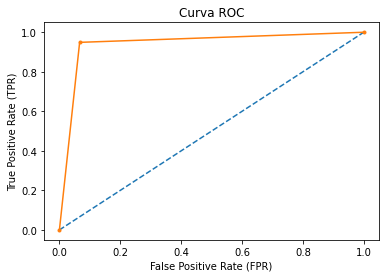

In [287]:
# Plotando a ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculando AUC
auc = roc_auc_score(train_etc_y['TARGET'], predictions)
print(f'AUC: {auc:.3f}')

# Calculando ROC Curve
fpr, tpr, thresholds = roc_curve(train_etc_y['TARGET'], predictions)

# Exibir a ROC curve do modelo
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("Curva ROC")
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

In [289]:
# Gerando arquivo para submissão no kaggle

# Realizando predição para o dataset de teste
predictions_test = XGB_etc.predict(test_etc)
test_sub = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID']).set_index("ID")
test_sub['TARGET'] = predictions_test

test_sub

,TARGET
ID,
2,1
5,1
6,1
7,1
9,1
...,...
151831,1
151832,1
151833,0


In [290]:
test_sub['TARGET'].value_counts()

1    62156
0    13662
Name: TARGET, dtype: int64

In [291]:
# Saving the results
test_sub.to_csv("santander-customer-satisfaction/submissions/results_etc_XGB.csv")

# (OLD) Submissions

## Correlation Models

In [200]:
test_cor = pd.read_csv('santander-customer-satisfaction/test_cor.csv', index_col = 0)
test_cor

,var15,imp_op_var39_comer_ult1,imp_op_var41_comer_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_ult1,num_op_var39_ult3,var36,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_op_var41_efect_ult3,num_op_var39_efect_ult3
0,32,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,3,0,0,0
1,35,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,3,0,0,0
2,23,0.0,0.0,60.0,60.0,60.0,60.0,3,3,3,3,3,0,0,0,3,3
3,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
4,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
75814,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0
75815,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,99,0,0,0,0,0
75816,40,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,0,0,0,0,0


In [7]:
# Normalizing the data

test_cor_norm = pd.DataFrame(norm_cor.transform(test_cor))
test_cor_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.339254,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.001691,-0.346125,-0.246910,-0.246506
1,-0.088589,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.001691,-0.346125,-0.246910,-0.246506
2,-1.091249,-0.208571,-0.210223,-0.101208,-0.142666,-0.101851,-0.144424,0.002429,-0.100119,-0.002698,-0.102749,-1.082092,-0.279732,-0.484460,-0.346125,0.299704,0.294955
3,-1.007694,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
4,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-1.091249,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75814,-0.840584,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75815,-1.007694,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,0.978245,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506
75816,0.329186,-0.208571,-0.210223,-0.166406,-0.216910,-0.166090,-0.217392,-0.269164,-0.280188,-0.268951,-0.279963,-1.082092,-0.279732,-0.484460,-0.346125,-0.246910,-0.246506


### KNN

In [89]:
KNN_cor = KNC_cor.fit(train_cor_norm_x, train_cor_y['TARGET'])

In [90]:
predictions_KNN_cor = KNN_cor.predict(test_cor_norm)

In [93]:
pd.DataFrame(predictions_KNN_cor).value_counts()

0    61653
1    14165
dtype: int64

In [112]:
test_sub = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID'])
test_sub['TARGET'] = predictions_KNN_cor

test_sub

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,0
151832,0
151833,0


In [115]:
# Saving the results
test_sub.to_csv("santander-customer-satisfaction/results_cor.csv")

### XGBoost

In [70]:
from xgboost import XGBClassifier

XGB_cor = XGBClassifier(booster = 'gbtree',
                        eta = 0.02,
                        gamma = 0,
                        max_depth = 5,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        objective = 'binary:logistic',
                        base_score = 0.5,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        eval_metric = 'auc'
                        )                

XGB_cor.fit(X = train_cor_norm_x, y = train_cor_y['TARGET'])

predictions_XGB_cor = XGB_cor.predict(test_cor_norm)

pd.DataFrame(predictions_XGB_cor).value_counts()

0    63208
1    12610
dtype: int64

In [71]:
test_sub = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID']).set_index("ID")
test_sub['TARGET'] = predictions_XGB_cor

test_sub

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,0
151832,0
151833,0


In [72]:
# Saving the results
test_sub.to_csv("santander-customer-satisfaction/results_cor_XGB.csv")

## PCA Models

In [80]:
test_pca = pd.read_csv('santander-customer-satisfaction/test_pca.csv').drop(['Unnamed: 0'], axis = 1)
test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-76917.021727,-14515.577792,1856.449112,-1119.024808,-805.908994,257.817513,-34.699490,71.831597,2.241370,-284.381880,128.732044,-8.445186,1.191545,2.228163,31.801767
1,-71962.988396,-14587.669498,1867.353760,-1120.547421,-829.074159,257.734221,-36.910660,72.918382,1.446100,-284.424356,128.882639,-8.476168,1.127796,2.168923,34.409243
2,-70454.789517,-14558.824958,1864.511229,-1121.298106,-717.134298,310.866487,-44.777305,80.776635,-1.274425,-171.827728,146.074582,-43.074133,-7.140333,1.723042,35.666066
3,70434.237405,-16533.653945,2189.086645,-1178.592964,-1353.382814,223.576158,-114.131175,98.205918,-16.156635,-287.960917,135.838375,-10.460279,1.270122,1.923002,-54.142943
4,-43802.139896,-14930.446628,1933.358052,-1136.691071,-884.704310,243.543943,-54.398442,75.995386,-0.591626,-285.365702,130.261910,-8.856175,1.201605,1.937000,31.636174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-77206.057309,-14520.907449,1855.482541,-1117.930244,-815.888320,257.867806,-35.287312,72.212699,2.067659,-284.660104,129.264364,-8.513038,1.258415,3.096365,-52.877512
75814,29501.200446,-15970.982688,2096.745295,-1162.257982,-1198.838403,233.099140,-91.890629,90.772654,-10.991950,-286.713362,133.432049,-9.827516,1.173309,1.350394,32.338524
75815,49839.972936,-16114.403230,2148.129463,-1185.001449,-1115.167140,222.782897,-96.473614,88.392206,-10.278291,-288.421297,135.126650,-10.124137,1.283311,2.069628,-54.028927
75816,-146.083569,-15566.769699,2029.691460,-1150.065333,-1090.710133,240.520824,-75.659393,85.564873,-7.386890,-286.047089,132.110512,-9.443321,1.159760,1.615398,32.518486


In [81]:
# Normalizing the data

test_pca_norm = pd.DataFrame(norm_pca.transform(test_pca))
test_pca_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.460061,-0.146971,0.053239,-0.042259,-0.043843,0.028501,-0.000300,0.014530,0.007360,-0.212512,0.145008,0.029056,0.003692,0.016068,0.879748
1,-0.425943,-0.148186,0.053791,-0.042345,-0.045694,0.028489,-0.000646,0.014868,0.006905,-0.212537,0.145195,0.028978,0.003267,0.015531,0.935565
2,-0.415556,-0.147700,0.053647,-0.042388,-0.036751,0.035849,-0.001876,0.017306,0.005348,-0.146042,0.166513,-0.058090,-0.051864,0.011491,0.962469
3,0.554733,-0.180972,0.070076,-0.045641,-0.087584,0.023758,-0.012719,0.022714,-0.003168,-0.214626,0.153820,0.023985,0.004216,0.013303,-0.960035
4,-0.232002,-0.153961,0.057132,-0.043262,-0.050139,0.026524,-0.003380,0.015823,0.005739,-0.213093,0.146905,0.028022,0.003759,0.013430,0.876203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,-0.462052,-0.147061,0.053190,-0.042197,-0.044641,0.028508,-0.000392,0.014649,0.007260,-0.212676,0.145668,0.028885,0.004138,0.023934,-0.932947
75814,0.272831,-0.171492,0.065402,-0.044713,-0.075237,0.025077,-0.009242,0.020408,-0.000213,-0.213889,0.150836,0.025577,0.003571,0.008115,0.891238
75815,0.412902,-0.173908,0.068003,-0.046005,-0.068552,0.023648,-0.009959,0.019669,0.000196,-0.214897,0.152938,0.024831,0.004304,0.014632,-0.957595
75816,0.068653,-0.164682,0.062008,-0.044021,-0.066598,0.026105,-0.006704,0.018792,0.001850,-0.213495,0.149198,0.026544,0.003480,0.010516,0.895090


### KNN

In [119]:
KNN_pca = KNC_pca.fit(train_pca_norm_x, train_pca_y['TARGET'])

predictions_KNN_pca = KNN_pca.predict(test_pca_norm)

In [120]:
pd.DataFrame(predictions_KNN_pca).value_counts()

0    59957
1    15861
dtype: int64

In [123]:
test_sub_pca = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID']).set_index('ID')
test_sub_pca['TARGET'] = predictions_KNN_pca

test_sub_pca

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,1
151832,0
151833,0


In [ ]:
# Saving the results
test_sub_pca.to_csv("santander-customer-satisfaction/results_pca.csv")

### XGBoost

In [99]:
XGB_pca = XGBClassifier(booster = 'gbtree',
                        eta = 0.05,
                        gamma = 0,
                        max_depth = 5,
                        reg_alpha = 0,
                        reg_lambda = 1,
                        objective = 'binary:logistic',
                        base_score = 0.5,
                        subsample = 0.7,
                        colsample_bytree = 0.7,
                        eval_metric = 'auc'
                        )   

XGB_pca.fit(train_pca_norm_x, train_pca_y['TARGET'])

predictions_XGB_pca = XGB_pca.predict(test_pca_norm)

pd.DataFrame(predictions_XGB_pca).value_counts()

0    61420
1    14398
dtype: int64

In [100]:
test_sub_pca = pd.DataFrame(pd.read_csv('santander-customer-satisfaction/test.csv')['ID']).set_index("ID")
test_sub_pca['TARGET'] = predictions_XGB_pca

test_sub_pca

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
...,...
151831,1
151832,0
151833,0


In [101]:
# Saving the results
test_sub_pca.to_csv("santander-customer-satisfaction/results_pca_XGB.csv")

# FIM !